<a href="https://colab.research.google.com/github/sabudev/CAIF/blob/main/Module_II_Exploratory_Data_Analysis_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this Python notebook we look at a tmdb dataset that contains diverse attributes of selected movies. The notebook focuses on doing simple descriptive analysis of the data, including summarization and visualization.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the git to access the data file**

In [ ]:
! git clone https://github.com/sabudev/CAIF.git

Cloning into 'CAIF'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


**`Read in the data file. The head() function shows the first few rows of data.`**

In [ ]:
dt = pd.read_csv('CAIF/tmdb_attributes.csv')
dt.head()

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,5/19/07,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,Spectre,107.376788,10/26/15,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,49026,en,The Dark Knight Rises,112.312950,7/16/12,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,John Carter,43.926995,3/7/12,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
dt.sort_values('revenue', ascending=False)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,597,en,Titanic,100.025899,11/18/97,1845034188,194.0,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,24428,en,The Avengers,144.448633,4/25/12,1519557910,143.0,Some assembly required.,The Avengers,7.4,11776
28,150000000,135397,en,Jurassic World,418.708552,6/9/15,1513528810,124.0,The park is open.,Jurassic World,6.5,8662
44,190000000,168259,en,Furious 7,102.322217,4/1/15,1506249360,137.0,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0,41248,fr,La Fille du RER,2.351706,3/18/09,0,105.0,NaN,The Girl on the Train,5.6,10
3199,0,291081,en,Red Riding: In the Year of Our Lord 1974,7.247023,2/28/09,0,102.0,"An epic tale of murder, corruption and obsession.",Red Riding: In the Year of Our Lord 1974,7.0,54
3197,6500000,8883,da,Flammen & Citronen,7.028946,3/25/08,0,130.0,NaN,Flame & Citron,6.8,68
3194,9000000,12454,en,All or Nothing,2.872281,5/17/02,0,128.0,NaN,All or Nothing,7.0,33


**Identify the different data types**

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   id                 4803 non-null   int64  
 2   original_language  4803 non-null   object 
 3   original_title     4803 non-null   object 
 4   popularity         4803 non-null   float64
 5   release_date       4802 non-null   object 
 6   revenue            4803 non-null   int64  
 7   runtime            4801 non-null   float64
 8   tagline            3959 non-null   object 
 9   title              4803 non-null   object 
 10  vote_average       4803 non-null   float64
 11  vote_count         4803 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 450.4+ KB


### Q1. Which variables are categorical?

### Q2. Which variables are numerical?

**Create a summary of the data. This function only shows a summary of the numeric variables**

In [ ]:
dt.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Plot the histogram of runtime. Here we are treating runtime as a continious variable.**

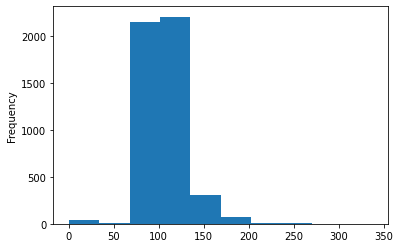

In [ ]:
dt['runtime'].plot.hist()

**Fancy histogram with header and axis labels. A similar logic can be used to construct any type of bar chart. In this case, we are treating points as a discrete (nominal) variable.**

Text(0, 0.5, 'Frequency')

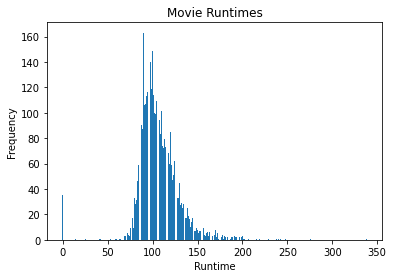

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = dt['runtime'].value_counts() 

# get x and y data 
runtime = data.index 
frequency = data.values 

# create bar chart 
ax.bar(runtime, frequency) 

# set title and labels 
ax.set_title('Movie Runtimes') 
ax.set_xlabel('Runtime') 
ax.set_ylabel('Frequency')

### Q3. Plot the histogram of 'budget' and 'revenue'

### Q4. Do you think the data should transformed for better visualization? If so, transform and re-plot the data.

#### Other ways of visualizing

In [ ]:
#Similar as before, but instead of creating the x and y data, just get the value counts for each point and sort them before plotting.
freq_runtime = dt['runtime'].value_counts()

#show that the freq chart looks like
freq_runtime

90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
338.0      1
53.0       1
214.0      1
194.0      1
179.0      1
Name: runtime, Length: 156, dtype: int64

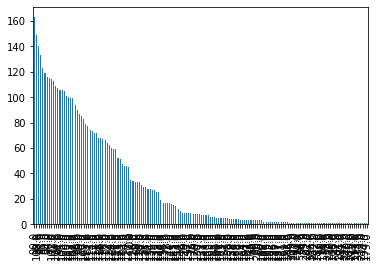

In [ ]:
#Plot the frequency chart
freq_runtime.plot.bar()

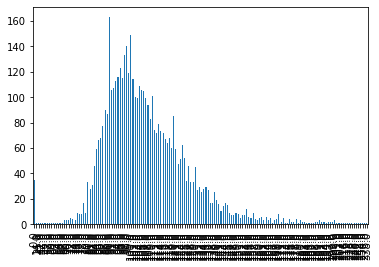

In [ ]:
#sort the points to plot before plotting
freq_runtime.sort_index().plot.bar()

**Bin the runtime into long (>200), fair (90-200) and short (<90) categories**

In [ ]:
category = pd.cut(dt.runtime, bins = [0, 90, 120, 500],labels=['Short','Fair','Long'])
category.value_counts()

Fair     2945
Long      988
Short     833
Name: runtime, dtype: int64

In [ ]:
#Add the categories to the dataframe 
dt.insert(4, "runtime_category", category)
dt.head()

,budget,id,original_language,original_title,runtime_category,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,Long,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,285,en,Pirates of the Caribbean: At World's End,Long,139.082615,5/19/07,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,Spectre,Long,107.376788,10/26/15,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,49026,en,The Dark Knight Rises,Long,112.312950,7/16/12,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,John Carter,Long,43.926995,3/7/12,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


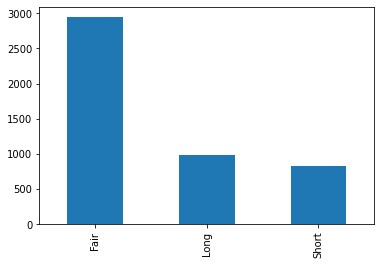

In [ ]:
#Plot the categorical variable
freq_category = dt.runtime_category.value_counts()
freq_category.plot.bar()

#### Find correlation between variables

In [ ]:
dt.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


### Q5. Interprest these correlations.

#### Visually show the relation between two variables - scatter plot

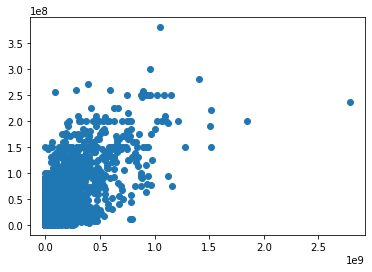

In [ ]:
plt.scatter(dt['revenue'], dt['budget'])

### Q6. Visually show the relationship between 'popularity' and 'vote_average'